# Classificador de vozes Fuzzy 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Classificador-de-vozes-Fuzzy" data-toc-modified-id="Classificador-de-vozes-Fuzzy-1">Classificador de vozes Fuzzy</a></span><ul class="toc-item"><li><span><a href="#Classificador-Fuzzy" data-toc-modified-id="Classificador-Fuzzy-1.1">Classificador Fuzzy</a></span><ul class="toc-item"><li><span><a href="#Variáveis-de-Entrada" data-toc-modified-id="Variáveis-de-Entrada-1.1.1">Variáveis de Entrada</a></span></li><li><span><a href="#Base-de-Regras" data-toc-modified-id="Base-de-Regras-1.1.2">Base de Regras</a></span></li><li><span><a href="#Inferência-Fuzzy" data-toc-modified-id="Inferência-Fuzzy-1.1.3">Inferência Fuzzy</a></span></li><li><span><a href="#Fluxo-Wang-Mendel" data-toc-modified-id="Fluxo-Wang-Mendel-1.1.4">Fluxo Wang-Mendel</a></span></li></ul></li><li><span><a href="#Referencias" data-toc-modified-id="Referencias-1.2">Referencias</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline

#importando dados para utilização
my_data = np.genfromtxt('voice.csv', delimiter=',')


## Classificador Fuzzy

### Variáveis de Entrada

In [2]:
resolution = 0.0001 #resoluçao alta devido a baixa variação dos valores

#Como todos os valores estão normalizados criaremos variaveis discretas entre 0 e 1
var1  = np.arange(0, 1+resolution, resolution)
var2  = np.arange(0, 1+resolution, resolution)
var3  = np.arange(0, 1+resolution, resolution)
var4  = np.arange(0, 1+resolution, resolution)
label = np.arange(0, 1+resolution, resolution)

In [3]:
#Definindo constantes para os nomes para reutilização em graficos e maps
VAR1_LO = 'VAR1 Baixa'
VAR1_ML = 'VAR1 Média Baixa'
VAR1_M  = 'VAR1 Média'
VAR1_MH = 'VAR1 Média Alta'
VAR1_HI = 'VAR1 Alta'

VAR2_LO = 'VAR2 Baixa'
VAR2_ML = 'VAR2 Média Baixa'
VAR2_M  = 'VAR2 Média'
VAR2_MH = 'VAR2 Média Alta'
VAR2_HI = 'VAR2 Alta'

VAR3_LO = 'VAR3 Baixa'
VAR3_ML = 'VAR3 Média Baixa'
VAR3_M  = 'VAR3 Média'
VAR3_MH = 'VAR3 Média Alta'
VAR3_HI = 'VAR3 Alta'

VAR4_LO = 'VAR4 Baixa'
VAR4_ML = 'VAR4 Média Baixa'
VAR4_M  = 'VAR4 Média'
VAR4_MH = 'VAR4 Média Alta'
VAR4_HI = 'VAR4 Alta'

LABL_M  = 'Voz Masculina'
LABL_F  = 'Voz Feminina'

In [4]:
#Gerando os conjuntos fuzzy uniformemente
var1_lo = fuzz.trimf(var1,[0,0,0.25])
var1_ml = fuzz.trimf(var1,[0,0.25,0.5])
var1_m  = fuzz.trimf(var1,[0.25,0.5,0.75])
var1_mh = fuzz.trimf(var1,[0.5,0.75,1])
var1_hi = fuzz.trimf(var1,[0.75,1,1 ])

var2_lo = fuzz.trimf(var2,[0,0,0.25])
var2_ml = fuzz.trimf(var2,[0,0.25,0.5])
var2_m  = fuzz.trimf(var2,[0.25,0.5,0.75])
var2_mh = fuzz.trimf(var2,[0.5,0.75,1])
var2_hi = fuzz.trimf(var2,[0.75,1,1 ])

var3_lo = fuzz.trimf(var3,[0,0,0.25])
var3_ml = fuzz.trimf(var3,[0,0.25,0.5])
var3_m  = fuzz.trimf(var3,[0.25,0.5,0.75])
var3_mh = fuzz.trimf(var3,[0.5,0.75,1])
var3_hi = fuzz.trimf(var3,[0.75,1,1 ])

var4_lo = fuzz.trimf(var4,[0,0,0.25])
var4_ml = fuzz.trimf(var4,[0,0.25,0.5])
var4_m  = fuzz.trimf(var4,[0.25,0.5,0.75])
var4_mh = fuzz.trimf(var4,[0.5,0.75,1])
var4_hi = fuzz.trimf(var4,[0.75,1,1 ])

labl_m  = fuzz.trapmf(label,[0,0,0.49,0.5])
labl_f  = fuzz.trapmf(label,[0.5,0.51,1,1])


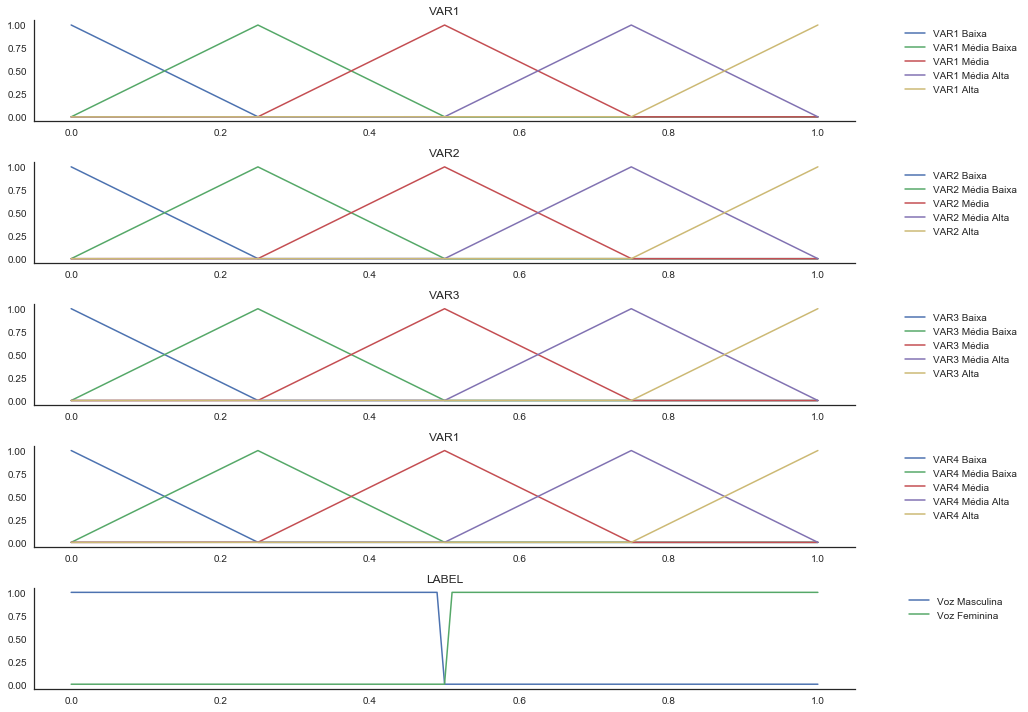

In [5]:
#Visualizando as variáveis criadas
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(12, 10))

ax0.plot(var1, var1_lo, 'b', linewidth=1.5, label=VAR1_LO)
ax0.plot(var1, var1_ml, 'g', linewidth=1.5, label=VAR1_ML)
ax0.plot(var1, var1_m , 'r', linewidth=1.5, label=VAR1_M)
ax0.plot(var1, var1_mh, 'm', linewidth=1.5, label=VAR1_MH)
ax0.plot(var1, var1_hi, 'y', linewidth=1.5, label=VAR1_HI)
ax0.set_title('VAR1')
ax0.legend(bbox_to_anchor=(1.05, 1))

ax1.plot(var2, var2_lo, 'b', linewidth=1.5, label=VAR2_LO)
ax1.plot(var2, var2_ml, 'g', linewidth=1.5, label=VAR2_ML)
ax1.plot(var2, var2_m , 'r', linewidth=1.5, label=VAR2_M)
ax1.plot(var2, var2_mh, 'm', linewidth=1.5, label=VAR2_MH)
ax1.plot(var2, var2_hi, 'y', linewidth=1.5, label=VAR2_HI)
ax1.set_title('VAR2')
ax1.legend(bbox_to_anchor=(1.05, 1))

ax2.plot(var3, var3_lo, 'b', linewidth=1.5, label=VAR3_LO)
ax2.plot(var3, var3_ml, 'g', linewidth=1.5, label=VAR3_ML)
ax2.plot(var3, var3_m , 'r', linewidth=1.5, label=VAR3_M)
ax2.plot(var3, var3_mh, 'm', linewidth=1.5, label=VAR3_MH)
ax2.plot(var3, var3_hi, 'y', linewidth=1.5, label=VAR3_HI)
ax2.set_title('VAR3')
ax2.legend(bbox_to_anchor=(1.05, 1))

ax3.plot(var4, var4_lo, 'b', linewidth=1.5, label=VAR4_LO)
ax3.plot(var4, var4_ml, 'g', linewidth=1.5, label=VAR4_ML)
ax3.plot(var4, var4_m , 'r', linewidth=1.5, label=VAR4_M)
ax3.plot(var4, var4_mh, 'm', linewidth=1.5, label=VAR4_MH)
ax3.plot(var4, var4_hi, 'y', linewidth=1.5, label=VAR4_HI)
ax3.set_title('VAR1')
ax3.legend(bbox_to_anchor=(1.05, 1))

ax4.plot(label, labl_m, 'b', linewidth=1.5, label=LABL_M)
ax4.plot(label, labl_f, 'g', linewidth=1.5, label=LABL_F)
ax4.set_title('LABEL')
ax4.legend(bbox_to_anchor=(1.19, 1))



# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3, ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()
fig.savefig('fuzzy-sets.png')

### Base de Regras

In [6]:
def generate_rule_base(dataset):
    """
    Método para gerar uma base de regras com base nas entradas
    Para cada entrada:
        1. obter o valor de ativação para cada função de pertinencia
        2. selecionar as maiores ativações de cada variável fuzzy
        3. gerar uma regra com as funcoes ativadas
        4. o valor de ativação dessa regra será o mínimo das ativações(norma-T)
    """
    
    #A base de resgras ficará da seguinte forma {(antecedentes):(consequente, ativaçao)}
    rule_base = {}
    for index, row in dataset.iterrows():
        var1_val = row['var1']
        var2_val = row['var2']
        var3_val = row['var3']
        var4_val = row['var4']
        label_val   = LABL_M if row['label'] == 0 else LABL_F
        
        #Obtendo os valores de ativacao. Guarda em um array o par(funcao,ativacao) e depois pega o de maior valor
        actvs_var1 = []
        actvs_var1.append((VAR1_LO, fuzz.interp_membership(var1, var1_lo, var1_val)))
        actvs_var1.append((VAR1_ML, fuzz.interp_membership(var1, var1_ml, var1_val)))
        actvs_var1.append((VAR1_M , fuzz.interp_membership(var1, var1_m , var1_val)))
        actvs_var1.append((VAR1_MH, fuzz.interp_membership(var1, var1_mh, var1_val)))
        actvs_var1.append((VAR1_HI, fuzz.interp_membership(var1, var1_hi, var1_val)))
        actvs_var1.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_var1 = actvs_var1[0]
        
        actvs_var2 = []
        actvs_var2.append((VAR2_LO, fuzz.interp_membership(var2, var2_lo, var2_val)))
        actvs_var2.append((VAR2_ML, fuzz.interp_membership(var2, var2_ml, var2_val)))
        actvs_var2.append((VAR2_M , fuzz.interp_membership(var2, var2_m , var2_val)))
        actvs_var2.append((VAR2_MH, fuzz.interp_membership(var2, var2_mh, var2_val)))
        actvs_var2.append((VAR2_HI, fuzz.interp_membership(var2, var2_hi, var2_val)))
        actvs_var2.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_var2 = actvs_var2[0]
        
        actvs_var3 = []
        actvs_var3.append((VAR3_LO, fuzz.interp_membership(var3, var3_lo, var3_val)))
        actvs_var3.append((VAR3_ML, fuzz.interp_membership(var3, var3_ml, var3_val)))
        actvs_var3.append((VAR3_M , fuzz.interp_membership(var3, var3_m , var3_val)))
        actvs_var3.append((VAR3_MH, fuzz.interp_membership(var3, var3_mh, var3_val)))
        actvs_var3.append((VAR3_HI, fuzz.interp_membership(var3, var3_hi, var3_val)))
        actvs_var3.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_var3 = actvs_var3[0]
        
        actvs_var4 = []
        actvs_var4.append((VAR4_LO, fuzz.interp_membership(var4, var4_lo, var4_val)))
        actvs_var4.append((VAR4_ML, fuzz.interp_membership(var4, var4_ml, var4_val)))
        actvs_var4.append((VAR4_M , fuzz.interp_membership(var4, var4_m , var4_val)))
        actvs_var4.append((VAR4_MH, fuzz.interp_membership(var4, var4_mh, var4_val)))
        actvs_var4.append((VAR4_HI, fuzz.interp_membership(var4, var4_hi, var4_val)))
        actvs_var4.sort(key=lambda var: var[1], reverse=True) #ordenando do maior para o menor
        activation_var4 = actvs_var4[0]
        
                
        
        #norma-T(min) para obter a ativaçao da regra
        activation_rule = min(
            activation_var1[1],
            activation_var2[1],
            activation_var3[1],
            activation_var4[1]
        )
        
        #Criando os valores para inserir na base de regras
        rule_key = (
            activation_var1[0],
            activation_var2[0],
            activation_var3[0],
            activation_var4[0]
            )
        rule_value = (label_val, activation_rule)
        
        #Inserindo na base de regras
        if rule_key in rule_base:
            #Mantém o de maior valor
            if rule_value[1] > rule_base[rule_key][1]:
                rule_base[rule_key] = rule_value
        else:
            rule_base[rule_key] = rule_value
            
    return rule_base

### Inferência Fuzzy

In [7]:
def fuzzify(data, rule_base):
    '''
    Recebe uma row do panda.Dataframe como parâmetro e a base de regras gerada
    '''
    var1_val  = data['var1']
    var2_val  = data['var2']
    var3_val  = data['var3']
    var4_val  = data['var4']
    label_val = LABL_M if data['label'] == 0 else LABL_F
    
    #Realiza o cálculo das ativações guardando no formato {antecedente:ativacao}
    activations = {}
    
    activations[VAR1_LO] = fuzz.interp_membership(var1, var1_lo, var1_val)
    activations[VAR1_ML] = fuzz.interp_membership(var1, var1_ml, var1_val)
    activations[VAR1_M]  = fuzz.interp_membership(var1, var1_m , var1_val)
    activations[VAR1_MH] = fuzz.interp_membership(var1, var1_mh, var1_val)
    activations[VAR1_HI] = fuzz.interp_membership(var1, var1_hi, var1_val)
    
    activations[VAR2_LO] = fuzz.interp_membership(var2, var2_lo, var2_val)
    activations[VAR2_ML] = fuzz.interp_membership(var2, var2_ml, var2_val)
    activations[VAR2_M]  = fuzz.interp_membership(var2, var2_m , var2_val)
    activations[VAR2_MH] = fuzz.interp_membership(var2, var2_mh, var2_val)
    activations[VAR2_HI] = fuzz.interp_membership(var2, var2_hi, var2_val)
    
    activations[VAR3_LO] = fuzz.interp_membership(var3, var3_lo, var3_val)
    activations[VAR3_ML] = fuzz.interp_membership(var3, var3_ml, var3_val)
    activations[VAR3_M]  = fuzz.interp_membership(var3, var3_m , var3_val)
    activations[VAR3_MH] = fuzz.interp_membership(var3, var3_mh, var3_val)
    activations[VAR3_HI] = fuzz.interp_membership(var3, var3_hi, var3_val)
    
    activations[VAR4_LO] = fuzz.interp_membership(var4, var4_lo, var4_val)
    activations[VAR4_ML] = fuzz.interp_membership(var4, var4_ml, var4_val)
    activations[VAR4_M]  = fuzz.interp_membership(var4, var4_m , var4_val)
    activations[VAR4_MH] = fuzz.interp_membership(var4, var4_mh, var4_val)
    activations[VAR4_HI] = fuzz.interp_membership(var4, var4_hi, var4_val)
    
    #Realizar as inferencias na base de regras e guarda numa lista as regras ativadas
    rules_activated = []
    for antecendentes,consequente in rule_base.items():
        var1_name, var2_name, var3_name, var4_name = antecendentes
        value = labl_m if consequente[0] == LABL_M else labl_f
        if(activations[var1_name] != 0 
           and activations[var2_name] != 0 
           and activations[var3_name] != 0 
           and activations[var4_name] != 0):
        
            rule_activation = min(activations[var1_name],activations[var2_name],activations[var3_name],activations[var4_name])
            rule_activated = np.fmin(rule_activation, value) #faz clipping do conjunto de saida
            rules_activated.append(rule_activated)
        
    #Combinando todas as saidas encontradas
    aggregated = 0
    for rule in rules_activated:
        aggregated = np.fmax(aggregated,rule)
    
    return aggregated
    

In [8]:
def defuzzify(fuzzy_aggregated, method = 'centroid'):
    return fuzz.defuzz(label, fuzzy_aggregated, method)

### Fluxo Wang-Mendel

![flow](img/flow.png)

In [9]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

voice = pd.read_csv("voice.csv") #carregando o dataset

#importando dados para vizualização
voice = pd.read_csv("voice.csv")

#Normalizando o dataset
min_max_scaler = preprocessing.MinMaxScaler()
voice_scaled = min_max_scaler.fit_transform(voice)
voice = pd.DataFrame(voice_scaled,columns=voice.columns)

#Criando novo dataset com as features
data = voice.values[:,:20] #removendo a coluna das classes
pca = PCA(n_components=4)

# Realiza o PCA e cria os eigen
pca.fit(data) 

# Transforma os dados utilizando os vetores
pca_data = pca.transform(data) 

#Insere os dados normalizados
voice_pca = pd.DataFrame(min_max_scaler.fit_transform(pca_data), columns=['var1','var2','var3','var4']) 

#Adiciona os labels
voice_pca['label'] = voice['label'] 
voice_pca.head()

,var1,var2,var3,var4,label
0,0.950681,0.244422,0.778701,0.271061,0.0
1,0.958705,0.166170,0.815179,0.340872,0.0
2,0.979964,0.162726,0.949242,0.571129,0.0
3,0.786553,0.503014,0.377060,0.375035,0.0
4,0.777072,0.685569,0.497369,0.289334,0.0


In [10]:
train, test = train_test_split(voice_pca, test_size=0.2)

In [11]:
rule_base = generate_rule_base(train)
#Visualizando regras
rules = []
for k,v in rule_base.items():
    r=list(k)
    r.append(v[0])
    rules.append(r)
rules_df = pd.DataFrame(rules,columns=['var1', 'var2', 'var3', 'var4', 'label'])
rules_df.sort_values(['var1','var2','var3','var4'])

,var1,var2,var3,var4,label
60,VAR1 Alta,VAR2 Média,VAR3 Média,VAR4 Média,Voz Masculina
29,VAR1 Alta,VAR2 Média,VAR3 Média,VAR4 Média Baixa,Voz Masculina
63,VAR1 Alta,VAR2 Média,VAR3 Média Alta,VAR4 Média,Voz Masculina
77,VAR1 Alta,VAR2 Média,VAR3 Média Alta,VAR4 Média Alta,Voz Masculina
10,VAR1 Alta,VAR2 Média,VAR3 Média Alta,VAR4 Média Baixa,Voz Feminina
64,VAR1 Alta,VAR2 Média Alta,VAR3 Média Alta,VAR4 Média Baixa,Voz Masculina
83,VAR1 Alta,VAR2 Média Baixa,VAR3 Alta,VAR4 Média,Voz Masculina
47,VAR1 Alta,VAR2 Média Baixa,VAR3 Alta,VAR4 Média Alta,Voz Masculina
81,VAR1 Alta,VAR2 Média Baixa,VAR3 Média,VAR4 Média,Voz Masculina
95,VAR1 Alta,VAR2 Média Baixa,VAR3 Média Alta,VAR4 Baixa,Voz Masculina


In [12]:
result = []
errors = 0
for index, data in test.iterrows():
    fuzzy_aggregated = fuzzify(data, rule_base)
    label_found = 1 if defuzzify(fuzzy_aggregated,'centroid') > 0.5 else 0
    result.append([label_found,int(data['label'])])
    if(int(label_found != data['label'])):
        errors += 1
result_df = pd.DataFrame(result,columns=['encontrado','real'])
result_df

,encontrado,real
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,0
9,1,0


In [14]:
print("ERROS: {} | PRECISAO: {}%".format(errors, 100 - errors*100/result_df['encontrado'].count()))

ERROS: 109 | PRECISAO: 82.80757097791798%


## Referencias
Dataset: https://www.kaggle.com/primaryobjects/voicegender/data  
Data visualization: https://www.kaggle.com/zhiboyang/data-visualization  
Trabalho semelhante: https://github.com/johntheo/MESTRADO/blob/master/notebooks/inteligencia_artificial/Trabalho-Fuzzy.ipynb 